In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# from utils.pixel import *

os.chdir(r"/home/lukas/Documents/ETH/MASTER_THESIS/code")

In [2]:
WW = True  # only consider 'Winter Wheat' otherwise consider Cereals

if WW:
    path_cov = os.path.join("data/yieldmapping_data", "WW_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "WW_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "WW_yield_tot.csv")
else:
    path_cov = os.path.join("data/yieldmapping_data",
                            "Cereals_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "Cereals_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "Cereals_yield_tot.csv")

d_cov = pd.read_csv(path_cov)
d_met = pd.read_csv(path_met)
d_yie = pd.read_csv(path_yie)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from csaps import csaps  # for natural cubic smoothing splines

class pixel:
    def __init__(self, coord_id, d_cov, d_met, d_yie):
        self.coord_id = coord_id
        self.cov = d_cov[d_cov.coord_id == coord_id]
        self.keep_ind = [True]*len(self.cov)
        self.yie = d_yie[d_yie.coord_id == coord_id]
        self.FID = self.cov.FID  # can take instead: set(...)
        self.met = d_met[d_met.FID.isin(set(self.FID))]

    # printing method:
    def __str__(self):
        return "FID:  " + str(set(self.FID)) + "--------------------------" + "\n" + "yield: " + str(self.yie) + "\n" + "coord_id: " + self.coord_id + "\n"

    def __repr__(self):
        return self.__str__()

    def get_ndvi(self):
        # NDVI := NIR(Band8)-Red(Band4)/NIR(Band8)+Red(Band4)
        if not hasattr(self, 'ndvi'):
            self.ndvi = (self.cov.B08 - self.cov.B04) / (self.cov.B08 + self.cov.B04)
        return self.ndvi

    def plot_ndvi(self):
        if not hasattr(self, 'ndvi'):
            self.get_ndvi()
        plt.scatter(self.cov.date, self.ndvi, c=list(map(int, temp.keep_ind)))
        plt.ylabel("NDVI")
        plt.ylim([0, 1])
        # for showing only some dates this might be helpful: 
        # https://www.geeksforgeeks.org/matplotlib-figure-figure-autofmt_xdate-in-python/
        plt.gcf().autofmt_xdate()
        # plt.show()

## NOW: Filter observations
    def filter_ndvi_min(self, date, i):
        if i in [0, len(self.cov)-1]:
            return True
        else:
            return (self.ndvi.iloc[i-1] < self.ndvi.iloc[i]) | (self.ndvi.iloc[i] > self.ndvi.iloc[i+1])
    
    def filter_method(self, method, date, i):
        match method:
            case "ndvi_min":
                return self.filter_ndvi_min(date, i)
            case _:
                print("filter method unkown")
                return False

    def filter(self, method):
        keep_ind = []
        for i, date in enumerate(self.cov.date):
            keep_ind.append(self.filter_method(method, date, i))
        self.keep_ind = keep_ind
        return keep_ind




def random_pixel(d_cov, d_met, d_yie, n=1):
    result = []
    cid = d_cov.coord_id.to_frame().sample(n, ignore_index=True).coord_id
    for i in range(n):
        result.append(pixel(cid[i], d_cov, d_met, d_yie))
    return result


In [15]:
temp = random_pixel(d_cov, d_met, d_yie, n=2)[0]

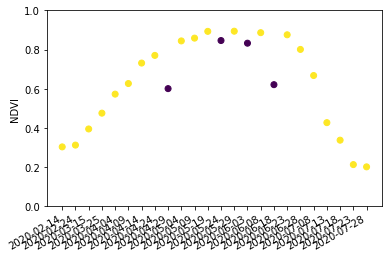

In [37]:
# temp = random_pixel(d_cov, d_met, d_yie, n=2)[0]
temp.get_ndvi()dateSeries
temp.filter("ndvi_min")
temp.plot_ndvi()

In [112]:
from datetime import datetime
np.random.seed(1234)
self = temp
x = self.cov.date
y = self.ndvi

## Function which helps with different time-formats
##    Converts pandas 'dateSeries' to unix time and provides
##    unix-numpy and pandas series with ´step´-seconds 
##  Output:
##    'pd_date in unix-numpy array', 
##    'unix-numpy series with `step`-increase',
##    'pandas-series with `step`-increase'
##  Default: increase of one day
def unix_std_date(pd_date, step=24*3600):
    # convert to unix
    x = pd.to_datetime(pd_date).astype(int) / 10**9 
    x = x.to_numpy()
    # get equaliy spaced dates
    xs_np = np.arange(x.min(), x.max(), step) # each day
    # convert from unix to %Y-%m-%d
    xs_pd = pd.DataFrame(xs_np * 10**9) 
    xs_pd = pd.to_datetime(xs_pd[0], format="%Y-%m-%d")
    return x, xs_np, xs_pd
    
unix_std_date(temp.cov.date)

(array([1.5816384e+09, 1.5825024e+09, 1.5842304e+09, 1.5850944e+09,
        1.5859584e+09, 1.5863904e+09, 1.5868224e+09, 1.5876864e+09,
        1.5881184e+09, 1.5885504e+09, 1.5889824e+09, 1.5898464e+09,
        1.5902784e+09, 1.5907104e+09, 1.5911424e+09, 1.5915744e+09,
        1.5924384e+09, 1.5928704e+09, 1.5933024e+09, 1.5941664e+09,
        1.5945984e+09, 1.5950304e+09, 1.5954624e+09, 1.5958944e+09]),
 array([1.5816384e+09, 1.5817248e+09, 1.5818112e+09, 1.5818976e+09,
        1.5819840e+09, 1.5820704e+09, 1.5821568e+09, 1.5822432e+09,
        1.5823296e+09, 1.5824160e+09, 1.5825024e+09, 1.5825888e+09,
        1.5826752e+09, 1.5827616e+09, 1.5828480e+09, 1.5829344e+09,
        1.5830208e+09, 1.5831072e+09, 1.5831936e+09, 1.5832800e+09,
        1.5833664e+09, 1.5834528e+09, 1.5835392e+09, 1.5836256e+09,
        1.5837120e+09, 1.5837984e+09, 1.5838848e+09, 1.5839712e+09,
        1.5840576e+09, 1.5841440e+09, 1.5842304e+09, 1.5843168e+09,
        1.5844032e+09, 1.5844896e+09, 1.584576